In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv('AAPL_quarterly_financials.csv')

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [26]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Amazon", "GDP Growth", "cryptocurrency", "Market", "Corebridge", "Unemployment", "Car", "Bridge", "Cow"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [27]:
X = df = df.resample("Q").mean()

In [28]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [29]:
X.head()

,Amazon,GDP Growth,cryptocurrency,Market,Corebridge,Unemployment,Car,Bridge,Cow
2004-03-31,15.000000,66.000000,0.0,59.333333,0.000000,9.333333,92.000000,83.000000,79.333333
2004-06-30,14.666667,67.000000,0.0,58.333333,14.666667,8.000000,98.333333,80.666667,53.000000
2004-09-30,15.333333,55.333333,0.0,56.000000,0.000000,7.000000,94.000000,81.666667,51.000000
2004-12-31,20.000000,58.333333,0.0,57.000000,0.000000,7.000000,80.666667,80.666667,53.333333
2005-03-31,17.333333,56.666667,0.0,52.666667,5.000000,7.666667,86.333333,82.000000,51.000000


# 3.) Normalize all the X data

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_scaled=scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso=Lasso(alpha=.005)

In [35]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.005)

In [36]:
coefficients = lasso.coef_

In [37]:
coefficients

array([ 0.19596137, -0.01627597,  0.1001461 ,  0.09239836,  0.07641045,
       -0.07914242, -0.00920605, -0.10773634,  0.0920284 ])

In [38]:
X.columns

Index(['Amazon', 'GDP Growth', 'cryptocurrency', 'Market', 'Corebridge',
       'Unemployment', 'Car', 'Bridge', 'Cow'],
      dtype='object')

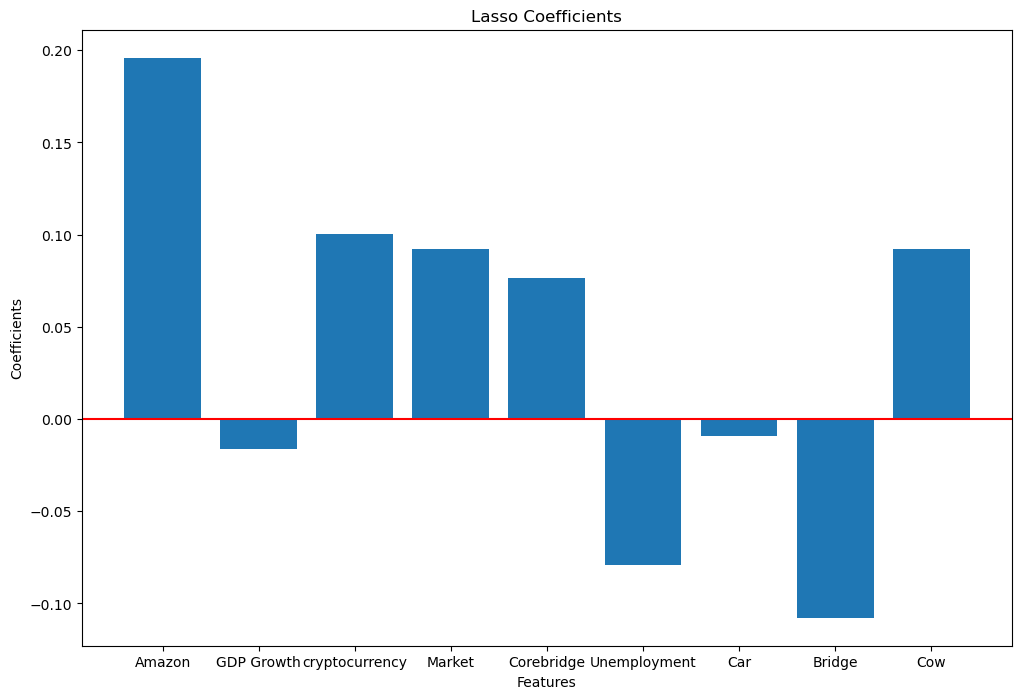

In [39]:
plt.figure(figsize = (12,8))
plt.bar(range(X_scaled.shape[1]), coefficients)
plt.xticks(range(len(coefficients)), X.columns)
plt.axhline(0, color = "red")
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

All the coefficents makes sense except cow and bridge. I did not expect bridge and cow to affect apple returns.